In [3]:
import numpy
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
HI_Pipe3D_WISE = fits.open("WISE_Pipe3D_HI_new.fits", memmap=True)
HI_Pipe3D_WISE_table = Table(HI_Pipe3D_WISE[1].data)

In [5]:
MHI_log_initial = numpy.array(HI_Pipe3D_WISE_table['LOGMHI'])  # Stores all data of MHI log(Msun)
SM_log_initial = numpy.array(HI_Pipe3D_WISE_table['log_Mass'])    #SM = Stellar Mass    log(Msun)
W2_initial = numpy.array(HI_Pipe3D_WISE_table['W2'])  # Stores all data of W2
W3_initial = numpy.array(HI_Pipe3D_WISE_table['W3'])  # Stores all data of W3
Flagall = numpy.array(HI_Pipe3D_WISE_table['conflag'])   # All Flag data 
Plateifu_initial = numpy.array(HI_Pipe3D_WISE_table['plateifu_1'])

good = numpy.where((MHI_log_initial > 0) & (Flagall==0))



# Data for positive MHI and confused data
MHI_log = MHI_log_initial[good]                  # HI Mass log(Msun)
SM_log = SM_log_initial[good]                    # Steller Mass log(Msun)
W2 = W2_initial[good]
W3 = W3_initial[good]
Plateifu = Plateifu_initial[good]

print(len(W2_initial))

MF_log = MHI_log - SM_log                     # Mass Fraction     log(Msun) 
W2diffW3 = W2 - W3

diff2line = numpy.full(len(W2), 2)

3656


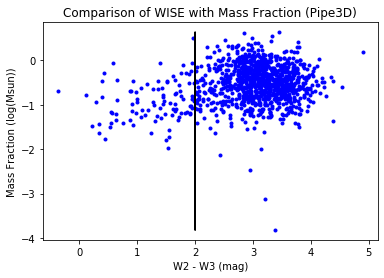

In [6]:
plt.xlabel("W2 - W3 (mag)")
plt.ylabel("Mass Fraction (log(Msun))")
plt.title("Comparison of WISE with Mass Fraction (Pipe3D)")

plt.plot(W2diffW3, MF_log, "b.") 
plt.plot(diff2line, MF_log, "k-")

# plt.xlim(0, 4.5)
# plt.ylim(-1.5, 0.5)
plt.show()

In [7]:
sample = numpy.where(W2diffW3 < 2)
notsample = numpy.where(W2diffW3 > 2)

print(sample)

print(len(Plateifu[sample].tolist()))
print(len(Plateifu[notsample].tolist()))

(array([  15,   19,   28,   61,  117,  121,  211,  281,  326,  373,  399,
        406,  449,  503,  535,  548,  549,  554,  560,  585,  602,  608,
        616,  618,  639,  653,  661,  669,  675,  676,  677,  683,  708,
        713,  715,  716,  719,  722,  737,  752,  758,  763,  771,  775,
        777,  782,  791,  797,  800,  804,  813,  819,  820,  849,  857,
        866,  869,  872,  877,  878,  881,  892,  894,  905,  918,  929,
        946,  952,  954,  958,  959,  967,  974,  993, 1006, 1033, 1043,
       1052, 1056, 1060, 1081, 1085, 1091, 1095, 1098, 1107, 1108, 1112,
       1118, 1129, 1137, 1150, 1163, 1168, 1172, 1173, 1175]),)
97
1019


/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [8]:
MHI_sample = MHI_log[sample]
W2diffW3_sample = W2diffW3[sample]
SM_sample = SM_log[sample]
MF_sample = MF_log[sample]
Plateifu_sample = [x.strip() for x in Plateifu[sample]]

MHI_notsample = MHI_log[notsample]
W2diffW3_notsample = W2diffW3[notsample]
SM_notsample = SM_log[notsample]
MF_notsample = MF_log[notsample]
Plateifu_notsample = [x.strip() for x in Plateifu[notsample]]

# i = 0
# required_index = []
# temp_index = []
# done_index = []

# err = 0.00005

# while len(required_index) <= 96:

#     for index1, mf1 in enumerate(MF_sample):
#         temp_index = []
#         for index2, mf2 in enumerate(MF_notsample):
#             if (mf2 < mf1 + err) and (mf2 > mf1 - err) and index2 not in required_index and index1 not in done_index :
#                 required_index.append(index2)
#                 done_index.append(index1)
#     err += 0.00005
    
# print(required_index)
# print(len(required_index))
    
# mf_index = [349, 163, 1013, 592, 292, 589, 612, 585, 240, 818, 354, 881, 500, 261, 683, 35, 773, 466, 903, 212, 809, 245, 364, 956, 629, 995, 337, 328, 1005, 946, 706, 856, 91, 483, 65, 1011, 570, 889, 801, 92, 554, 891, 251, 778, 970, 840, 425, 173, 598, 926, 551, 179, 1003, 514, 34, 161, 786, 1004, 948, 560, 542, 871, 648, 31, 966, 726, 647, 918, 947, 1017, 577, 879, 994, 1002, 928, 921, 785, 469, 366, 783, 69, 1015, 836, 607, 816, 609, 674, 412, 369, 562, 653, 719, 617, 673, 787, 802, 147]

# control = [Plateifu_notsample[x] for x in range(len(Plateifu_notsample)) if x in mf_index]
# MF_control = [MF_notsample[x] for x in range(len(Plateifu_notsample)) if x in mf_index]

# plt.xlabel("Mass Fraction-sample")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Mass Fraction for sample galaxies")
# plt.hist(MF_sample, bins=10)
# plt.show()

# plt.xlabel("Mass Fraction-control")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Mass Fraction for control galaxies")
# plt.hist(MF_control, bins=10)
# plt.show()

In [9]:
MHI_sample = MHI_log[sample]
W2diffW3_sample = W2diffW3[sample]
SM_sample = SM_log[sample]
MF_sample = MF_log[sample]
Plateifu_sample = [x.strip() for x in Plateifu[sample]]

MHI_notsample = MHI_log[notsample]
W2diffW3_notsample = W2diffW3[notsample]
SM_notsample = SM_log[notsample]
MF_notsample = MF_log[notsample]
Plateifu_notsample = [x.strip() for x in Plateifu[notsample]]

# i = 0
# required_index = []
# temp_index = []
# done_index = []

# err = 0.00001

# while len(required_index) <= 96:

#     for index1, sm1 in enumerate(SM_sample):
#         temp_index = []
#         for index2, sm2 in enumerate(SM_notsample):
#             if (sm2 < sm1 + err) and (sm2 > sm1 - err) and index2 not in required_index and index1 not in done_index :
#                 required_index.append(index2)
#                 done_index.append(index1)
#         err += 0.00001
    
# print(required_index)
# print(len(required_index))

# sm_index = [557, 949, 804, 615, 858, 377, 966, 955, 841, 321, 517, 35, 198, 801, 599, 598, 583, 736, 167, 791, 236, 550, 613, 718, 941, 944, 614, 611, 816, 1008, 950, 592, 448, 33, 887, 427, 836, 1012, 779, 71, 111, 527, 667, 296, 662, 335, 299, 576, 702, 706, 647, 742, 119, 525, 783, 766, 767, 922, 173, 416, 578, 475, 328, 982, 673, 756, 37, 511, 585, 545, 755, 610, 687, 820, 608, 709, 292, 683, 1018, 690, 205, 925, 612, 147, 953, 537, 974, 866, 871, 938, 515, 884, 739, 934, 594, 741, 441]
# control = [Plateifu_notsample[x] for x in range(len(Plateifu_notsample)) if x in sm_index]
# SM_control = [SM_notsample[x] for x in range(len(Plateifu_notsample)) if x in sm_index]

# plt.xlabel("Stellar Mass - sample")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Stellar Mass for sample galaxies")
# plt.hist(SM_sample, bins=10)
# plt.show()

# plt.xlabel("Stellar Mass-control")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Stellar Mass for control galaxies")
# plt.hist(SM_control, bins=10)
# plt.show()
    



In [10]:
# mf_index = [349, 163, 1013, 592, 292, 589, 612, 585, 240, 818, 354, 881, 500, 261, 683, 35, 773, 466, 903, 212, 809, 245, 364, 956, 629, 995, 337, 328, 1005, 946, 706, 856, 91, 483, 65, 1011, 570, 889, 801, 92, 554, 891, 251, 778, 970, 840, 425, 173, 598, 926, 551, 179, 1003, 514, 34, 161, 786, 1004, 948, 560, 542, 871, 648, 31, 966, 726, 647, 918, 947, 1017, 577, 879, 994, 1002, 928, 921, 785, 469, 366, 783, 69, 1015, 836, 607, 816, 609, 674, 412, 369, 562, 653, 719, 617, 673, 787, 802, 147]
# sm_index = [557, 949, 804, 615, 858, 377, 966, 955, 841, 321, 517, 35, 198, 801, 599, 598, 583, 736, 167, 791, 236, 550, 613, 718, 941, 944, 614, 611, 816, 1008, 950, 592, 448, 33, 887, 427, 836, 1012, 779, 71, 111, 527, 667, 296, 662, 335, 299, 576, 702, 706, 647, 742, 119, 525, 783, 766, 767, 922, 173, 416, 578, 475, 328, 982, 673, 756, 37, 511, 585, 545, 755, 610, 687, 820, 608, 709, 292, 683, 1018, 690, 205, 925, 612, 147, 953, 537, 974, 866, 871, 938, 515, 884, 739, 934, 594, 741, 441]

# control_sm = [Plateifu_notsample[x] for x in range(len(Plateifu_notsample)) if x in sm_index]
# SM_control_sm = [SM_notsample[x] for x in range(len(Plateifu_notsample)) if x in sm_index]
# MF_control_sm = [MF_notsample[x] for x in range(len(Plateifu_notsample)) if x in sm_index]

# plt.xlabel("Mass Fraction-sample")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Mass Fraction for sample galaxies")
# plt.hist(MF_sample, bins=10)
# plt.show()

# plt.xlabel("Mass Fraction-control")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Mass Fraction distribution for stellar mass control galaxies")
# plt.hist(MF_control_sm, bins=10)
# plt.show()


# control_mf = [Plateifu_notsample[x] for x in range(len(Plateifu_notsample)) if x in mf_index]
# SM_control_mf = [SM_notsample[x] for x in range(len(Plateifu_notsample)) if x in mf_index]
# MF_control_mf = [MF_notsample[x] for x in range(len(Plateifu_notsample)) if x in mf_index]

# plt.xlabel("Stellar Mass - sample")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Stellar Mass for sample galaxies")
# plt.hist(SM_sample, bins=10)
# plt.show()

# plt.xlabel("Stellar Mass-control")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Stellar Mass distribution for mass fraction control galaxies")
# plt.hist(SM_control_mf, bins=10)
# plt.show()



In [11]:
# plt.xlabel("MHI-sample")
# plt.ylabel("Frequency")
# plt.title("Histogram showing MHI for sample galaxies")
# plt.hist(MHI_sample, bins='auto')
# plt.show()
# plt.xlabel("Stellar Mass-sample")
# plt.ylabel("Frequency")
# plt.title("Histogram showing SM for sample galaxies")
# plt.hist(SM_sample, bins='auto')
# plt.show()
# plt.xlabel("Mass Fraction-sample")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Mass Fraction for sample galaxies")
# plt.hist(MF_sample, bins='auto')
# plt.show()

In [12]:
MHI_sample = MHI_log[sample]
W2diffW3_sample = W2diffW3[sample]
SM_sample = SM_log[sample]
MF_sample = MF_log[sample]
Plateifu_sample = [x.strip() for x in Plateifu[sample]]

MHI_notsample = MHI_log[notsample]
W2diffW3_notsample = W2diffW3[notsample]
SM_notsample = SM_log[notsample]
MF_notsample = MF_log[notsample]
Plateifu_notsample = [x.strip() for x in Plateifu[notsample]]

i = 0
required_index = []
temp_index = []
done_index = []

err = 0.000005

# while len(required_index) <= 96:

#     for index1, sm1 in enumerate(SM_sample):
#         temp_index = []
#         for index2, sm2 in enumerate(SM_notsample):
#             if (sm2 < sm1 + err) and (sm2 > sm1 - err) and (MF_notsample[index2] < MF_sample[index1] + err) and \
#             (MF_notsample[index2] > MF_sample[index1] - err) and index2 not in required_index and index1 not in done_index :
#                 required_index.append(index2)
#                 done_index.append(index1)
#         err += 0.000005
    
# print(required_index)
# print(len(required_index))
    



['10517-3702', '8252-12701', '8317-6101', '8338-12704', '8552-6101', '8711-6103', '8995-12702', '10517-9101', '8149-9101', '8447-1901', '8716-12703', '8981-12705', '8989-12705', '10499-3702', '8155-3703', '8438-6102', '9497-3703', '10221-9101', '10503-12703', '10512-12702', '10512-6102', '10512-9102', '10514-12705', '10514-9102', '10516-12701', '10516-6104', '7443-6102', '7495-12704', '7975-9102', '7992-6104', '7993-12701', '7993-1902', '8078-12701', '8078-6103', '8080-6104', '8084-12703', '8137-12703', '8140-3701', '8141-12703', '8149-3704', '8241-12703', '8241-6102', '8243-12704', '8244-6102', '8315-9102', '8325-12703', '8439-12703', '8443-6103', '8449-12702', '8482-12705', '8549-12704', '8550-12704', '8553-9101', '8554-12702', '8555-12705', '8567-3701', '8588-12704', '8591-12705', '8592-6102', '8601-9101', '8604-12701', '8611-9102', '8612-12703', '8624-9102', '8625-12703', '8626-3703', '8713-9102', '8715-12701', '8932-3701', '8943-1901', '8944-12703', '8944-9101', '8982-9101', '8983

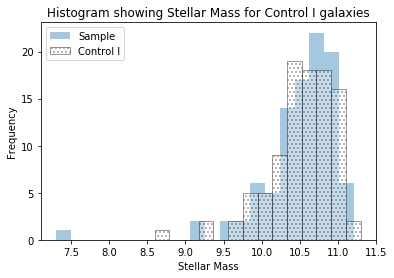

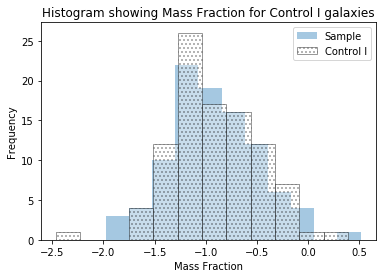

In [34]:
control_index = [702, 862, 972, 944, 383, 728, 976, 511, 810, 566, 576, 641, 173, 848, 858, 608, 607, 560, 829, 584, 883, 9, 783, 1018, 495, 820, 893, 800, 738, 897, 948, 817, 659, 711, 960, 747, 506, 793, 565, 779, 942, 95, 900, 765, 927, 1013, 572, 613, 328, 928, 78, 859, 619, 673, 418, 826, 241, 677, 643, 672, 573, 977, 964, 1017, 809, 563, 983, 782, 537, 947, 598, 796, 612, 570, 879, 635, 816, 903, 354, 551, 785, 902, 149, 580, 802, 908, 110, 778, 674, 446, 787, 918, 917, 609, 626, 790, 441]

control_plateifu = [Plateifu_notsample[x] for x in range(len(Plateifu_notsample)) if x in control_index]

print(control_plateifu)

SM_control = [SM_notsample[x] for x in range(len(Plateifu_notsample)) if x in control_index]
MF_control = [MF_notsample[x] for x in range(len(Plateifu_notsample)) if x in control_index]

plt.xlabel("Stellar Mass")
plt.ylabel("Frequency")
plt.title("Histogram showing Stellar Mass for Control I galaxies")
plt.hist(SM_sample, bins='auto', alpha=0.4, label='Sample')
plt.hist(SM_control, bins='auto', alpha=0.4, label='Control I', hatch='...', fc="white", ec="black")
plt.legend()
plt.show()


plt.xlabel("Mass Fraction")
plt.ylabel("Frequency")
plt.title("Histogram showing Mass Fraction for Control I galaxies")
plt.hist(MF_sample, bins='auto', alpha=0.4, label='Sample')
plt.hist(MF_control, bins='auto', alpha=0.4, label='Control I', hatch='...', fc="white", ec="black")
plt.legend()
plt.show()

